In [1]:
%matplotlib inline

# Image analysis

In [2]:
import math
import matplotlib
import matplotlib.pyplot
import scipy.ndimage
import skimage
import skimage.color
import skimage.data
import skimage.feature
import skimage.filters
import skimage.io
import skimage.morphology
import skimage.util

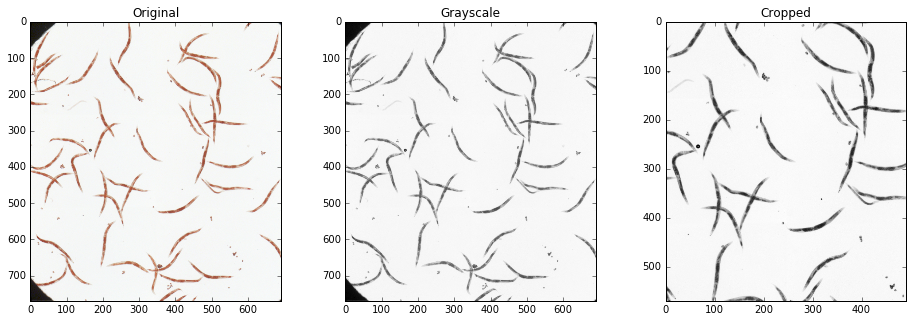

In [3]:
image = skimage.io.imread("images/BBBC011/L4440/1/1.png")

grayscale = skimage.color.rgb2gray(image)

cropped = skimage.util.crop(grayscale, 100)

_, (a, b, c) = matplotlib.pyplot.subplots(
    figsize=(16, 5),
    ncols=3
)

a.imshow(image)
a.set_title("Original")

b.imshow(grayscale, cmap=matplotlib.pyplot.cm.gray)
b.set_title("Grayscale")

c.imshow(cropped, cmap=matplotlib.pyplot.cm.gray)
c.set_title("Cropped")

matplotlib.pyplot.show()

## Image segmentation

### Thresholding

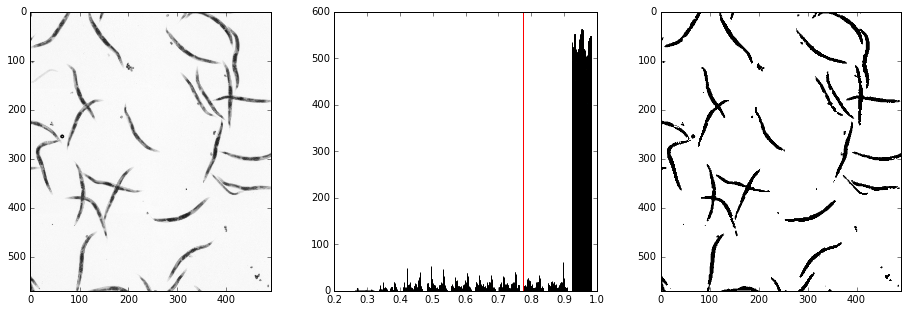

In [4]:
threshold = skimage.filters.threshold_otsu(cropped)

binary = cropped > threshold

_, (a, b, c) = matplotlib.pyplot.subplots(
    figsize=(16, 5),
    ncols=3
)

a.imshow(cropped, cmap=matplotlib.pyplot.cm.gray)

b.hist(cropped)
b.axvline(threshold, color="red")

c.imshow(binary, cmap=matplotlib.pyplot.cm.gray)

matplotlib.pyplot.show()

#### Otsu’s method

/usr/local/var/pyenv/versions/2.7.11/Python.framework/Versions/2.7/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


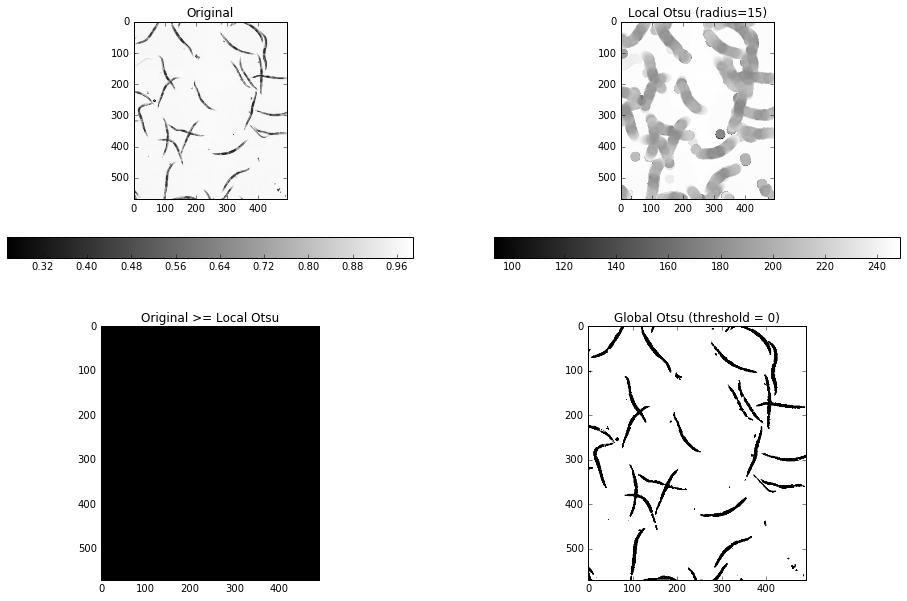

In [5]:
radius = 15

disk = skimage.morphology.disk(radius)

local_otsu = skimage.filters.rank.otsu(cropped, disk)

threshold_global_otsu = skimage.filters.threshold_otsu(cropped)

global_otsu = cropped >= threshold_global_otsu

figure, axis = matplotlib.pyplot.subplots(
    figsize=(16, 10),
    ncols=2, 
    nrows=2
)

a, b, c, d = axis.ravel()

figure.colorbar(a.imshow(cropped, cmap=matplotlib.pyplot.cm.gray), ax=a, orientation='horizontal')
a.set_title('Original')

figure.colorbar(b.imshow(local_otsu, cmap=matplotlib.pyplot.cm.gray), ax=b, orientation='horizontal')
b.set_title('Local Otsu (radius=%d)' % radius)

c.imshow(cropped >= local_otsu, cmap=matplotlib.pyplot.cm.gray)
c.set_title('Original >= Local Otsu' % threshold_global_otsu)

d.imshow(global_otsu, cmap=matplotlib.pyplot.cm.gray)
d.set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)

matplotlib.pyplot.show()

### Watershed

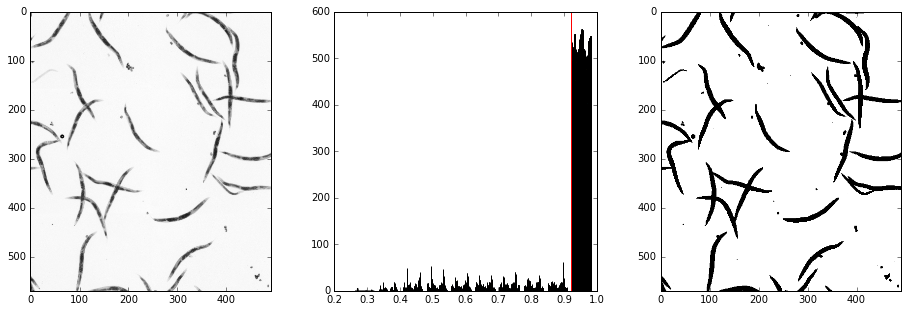

In [6]:
threshold = 0.92

binary = cropped > threshold

_, (a, b, c) = matplotlib.pyplot.subplots(
    figsize=(16, 5),
    ncols=3
)

a.imshow(cropped, cmap=matplotlib.pyplot.cm.gray)

b.hist(cropped)
b.axvline(threshold, color="red")

c.imshow(binary, cmap=matplotlib.pyplot.cm.gray)

matplotlib.pyplot.show()

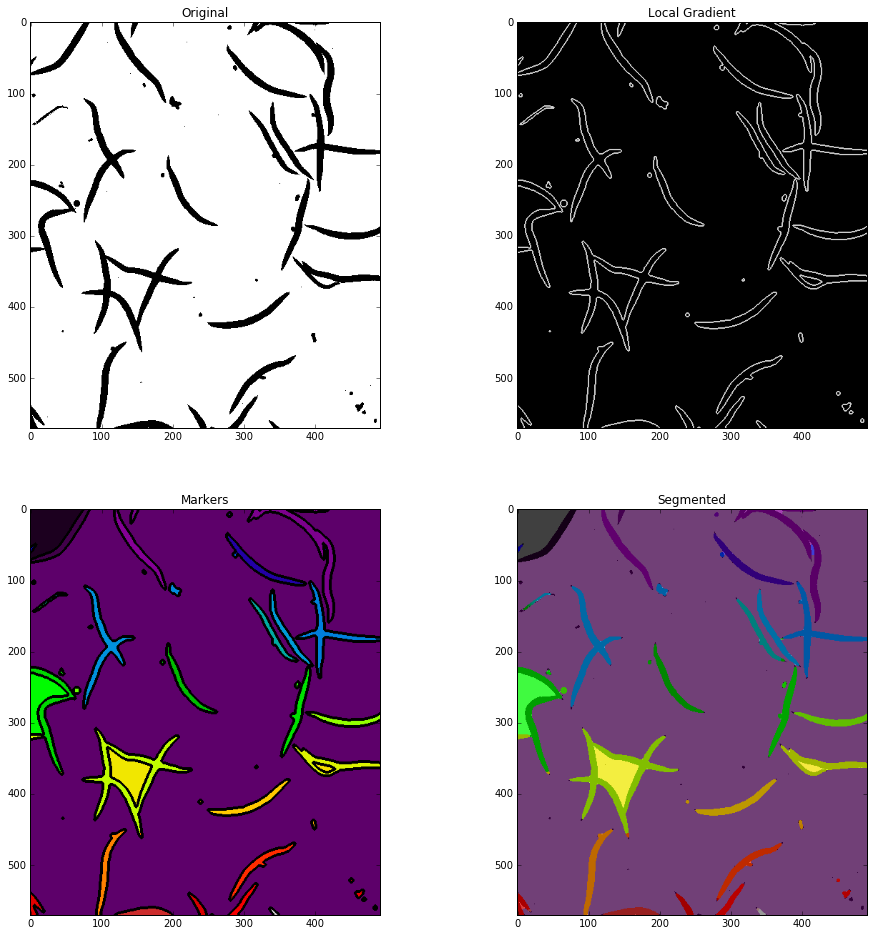

In [7]:
median_disk = skimage.morphology.disk(2)

median = skimage.filters.rank.median(binary, median_disk)

gradient_disk = skimage.morphology.disk(2)

markers = skimage.filters.rank.gradient(median, gradient_disk) < 10

markers = scipy.ndimage.label(markers)[0]

local_gradient_disk = skimage.morphology.disk(1)

gradient = skimage.filters.rank.gradient(median, local_gradient_disk)

labels = skimage.morphology.watershed(gradient, markers)

_, axes = matplotlib.pyplot.subplots(
    figsize=(16, 16),
    ncols=2, 
    nrows=2 
)

axes = axes.ravel()

a, b, c, d = axes

a.imshow(binary, cmap=matplotlib.pyplot.cm.gray)
a.set_title("Original")

b.imshow(gradient, cmap=matplotlib.pyplot.cm.spectral)
b.set_title("Local Gradient")

c.imshow(markers, cmap=matplotlib.pyplot.cm.spectral)
c.set_title("Markers")

d.imshow(binary, cmap=matplotlib.pyplot.cm.gray)
d.imshow(labels, cmap=matplotlib.pyplot.cm.spectral, alpha=0.75)
d.set_title("Segmented")

matplotlib.pyplot.show()

## Object recognition

### Feature detection

#### Edge detection

##### Sobel operator

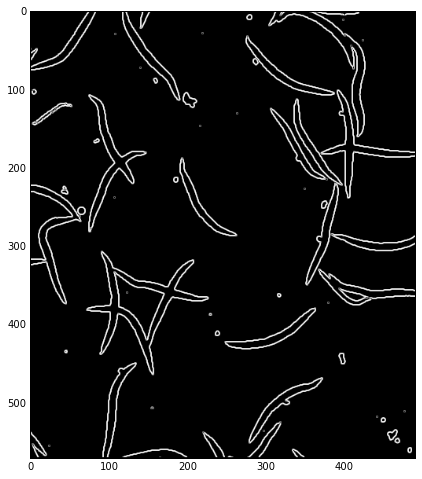

In [8]:
sobel = skimage.filters.sobel(binary)

_, (axis) = matplotlib.pyplot.subplots(
    figsize=(16, 8)
)

axis.imshow(sobel, cmap=matplotlib.pyplot.cm.gray)

##### Canny edge detector

In [9]:
sigma_1 = skimage.feature.canny(binary, sigma=0.05)
sigma_2 = skimage.feature.canny(binary, sigma=0.10)
sigma_3 = skimage.feature.canny(binary, sigma=0.25)
sigma_4 = skimage.feature.canny(binary, sigma=0.50)
sigma_5 = skimage.feature.canny(binary, sigma=1.00)
sigma_6 = skimage.feature.canny(binary, sigma=2.00)

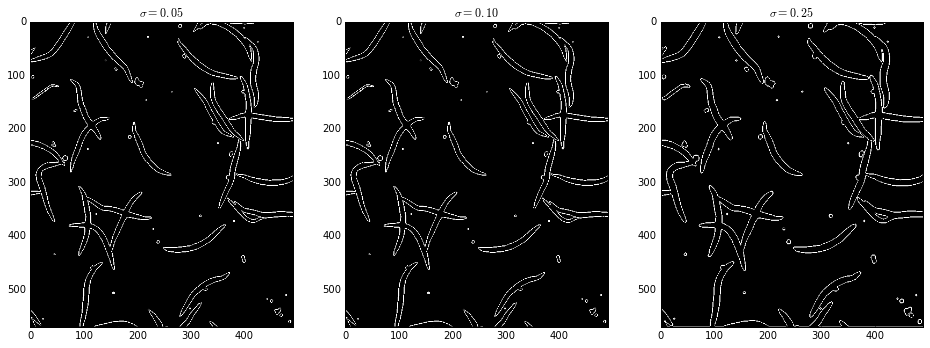

In [10]:
_, (a, b, c) = matplotlib.pyplot.subplots(
    ncols=3,
    figsize=(16, 8)
)

a.imshow(sigma_1, cmap=matplotlib.pyplot.cm.gray)
a.set_title("$\sigma=0.05$")

b.imshow(sigma_2, cmap=matplotlib.pyplot.cm.gray)
b.set_title("$\sigma=0.10$")

c.imshow(sigma_3, cmap=matplotlib.pyplot.cm.gray)
c.set_title("$\sigma=0.25$")

matplotlib.pyplot.show()

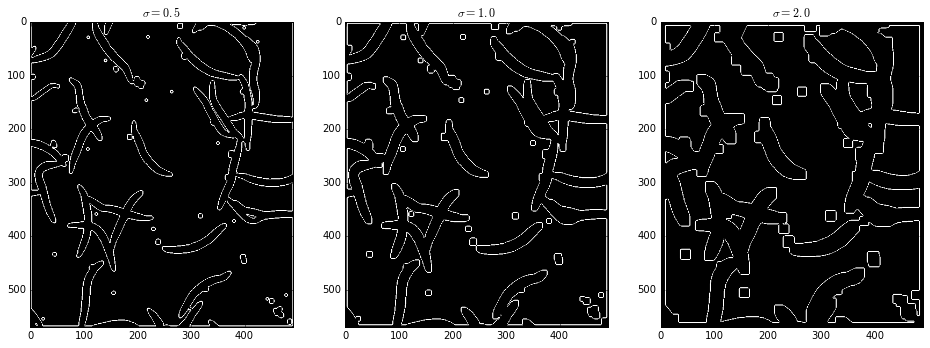

In [11]:
_, (a, b, c) = matplotlib.pyplot.subplots(
    figsize=(16, 8),
    ncols=3
)

a.imshow(sigma_4, cmap=matplotlib.pyplot.cm.gray)
a.set_title("$\sigma=0.5$")

b.imshow(sigma_5, cmap=matplotlib.pyplot.cm.gray)
b.set_title("$\sigma=1.0$")

c.imshow(sigma_6, cmap=matplotlib.pyplot.cm.gray)
c.set_title("$\sigma=2.0$")

matplotlib.pyplot.show()

#### Blob detection

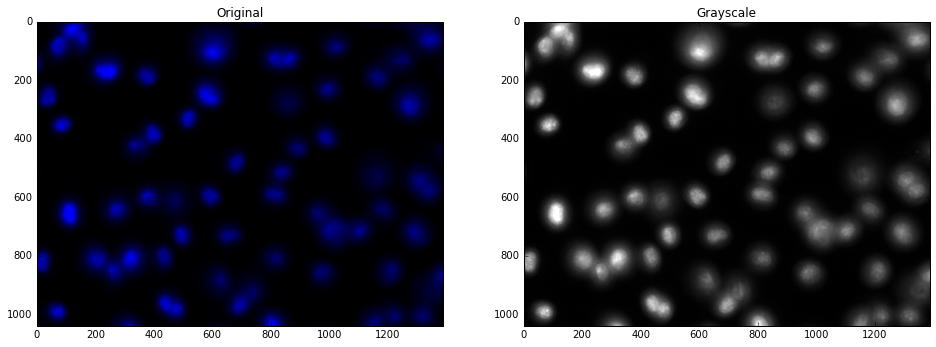

In [12]:
image = skimage.io.imread("images/BBBC020/1/3.tif")

grayscale = skimage.color.rgb2gray(image)

cropped = skimage.util.crop(grayscale, 100)

_, (a, b) = matplotlib.pyplot.subplots(
    figsize=(16, 8),
    ncols=2
)

a.imshow(image)
a.set_title("Original")

b.imshow(grayscale, cmap=matplotlib.pyplot.cm.gray)
b.set_title("Grayscale")

matplotlib.pyplot.show()

/usr/local/var/pyenv/versions/2.7.11/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:5907: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 1040 x 1388)
  '(shape is %d x %d)' % inp.shape[::-1])


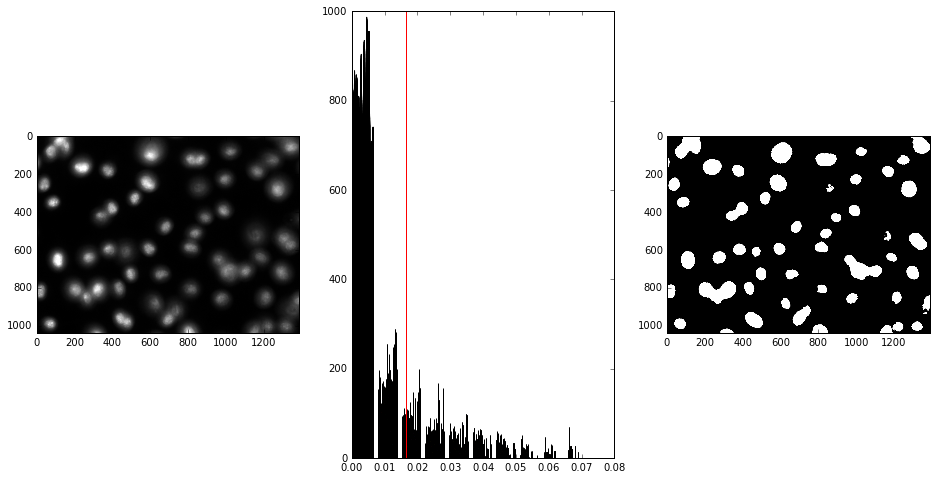

In [13]:
threshold = skimage.filters.threshold_otsu(grayscale)

binary = grayscale > threshold

_, (a, b, c) = matplotlib.pyplot.subplots(
    figsize=(16, 8),
    ncols=3
)

a.imshow(grayscale, cmap=matplotlib.pyplot.cm.gray)

b.hist(grayscale)
b.axvline(threshold, color="red")

c.imshow(binary, cmap=matplotlib.pyplot.cm.gray)

matplotlib.pyplot.show()

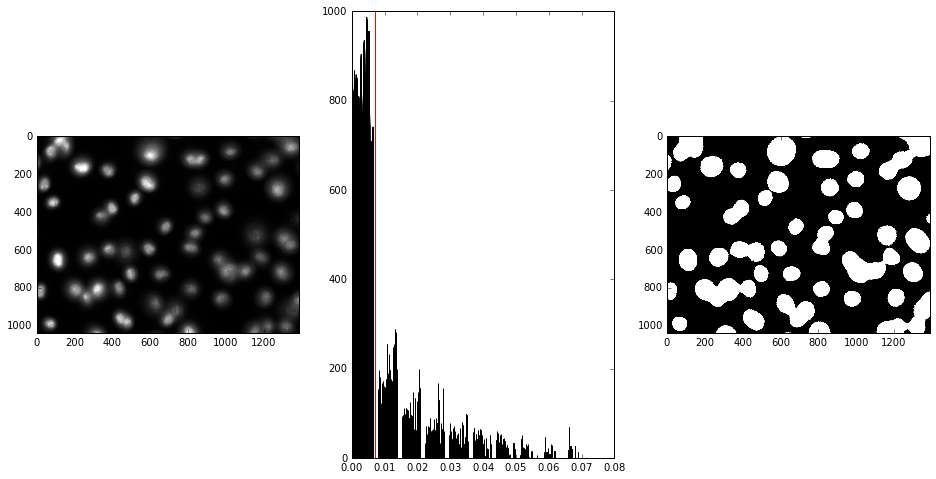

In [14]:
threshold = 0.007

binary = grayscale > threshold

_, (a, b, c) = matplotlib.pyplot.subplots(
    ncols=3, 
    figsize=(16, 8)
)

a.imshow(grayscale, cmap=matplotlib.pyplot.cm.gray)

b.hist(grayscale)
b.axvline(threshold, color="red")

c.imshow(binary, cmap=matplotlib.pyplot.cm.gray)

matplotlib.pyplot.show()

##### Laplacian of Gaussian (LoG)

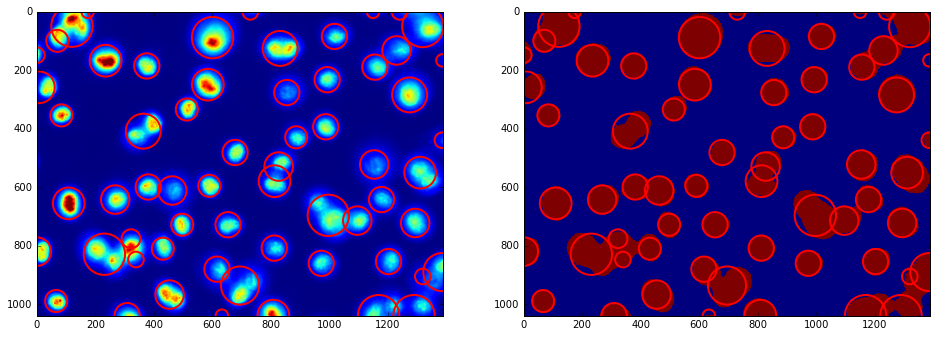

In [15]:
blobs = skimage.feature.blob_log(
    image=binary, 
    max_sigma=50,
    min_sigma=15,
    num_sigma=10, 
    threshold=0.2
)

blobs[:, 2] = blobs[:, 2] * math.sqrt(2)

_, (a, b) = matplotlib.pyplot.subplots(
    figsize=(16, 8),
    ncols=2
)

a.imshow(grayscale)

for ordinate, abscissa, radius in blobs:
    circle = matplotlib.pyplot.Circle((abscissa, ordinate), radius, color="red", linewidth=2, fill=False)
    
    a.add_patch(circle)

b.imshow(binary)

for ordinate, abscissa, radius in blobs:
    circle = matplotlib.pyplot.Circle((abscissa, ordinate), radius, color="red", linewidth=2, fill=False)
    
    b.add_patch(circle)
    
matplotlib.pyplot.show()

##### Difference of Gaussians (DoG)

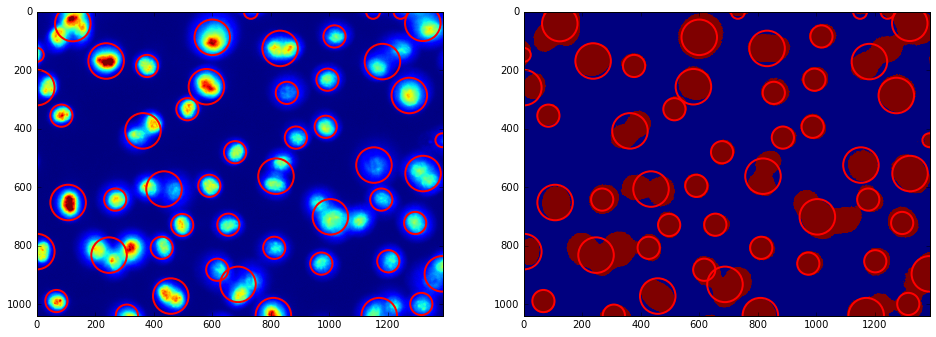

In [ ]:
blobs = skimage.feature.blob_dog(
    image=binary, 
    min_sigma=1, 
    max_sigma=50, 
    sigma_ratio=1.6, 
    threshold=2.0, 
    overlap=0.5
)

blobs[:, 2] = blobs[:, 2] * math.sqrt(2)

_, (a, b) = matplotlib.pyplot.subplots(
    figsize=(16, 8),
    ncols=2
)

a.imshow(grayscale)

for ordinate, abscissa, radius in blobs:
    circle = matplotlib.pyplot.Circle((abscissa, ordinate), radius, color="red", linewidth=2, fill=False)
    
    a.add_patch(circle)

b.imshow(binary)

for ordinate, abscissa, radius in blobs:
    circle = matplotlib.pyplot.Circle((abscissa, ordinate), radius, color="red", linewidth=2, fill=False)
    
    b.add_patch(circle)
    
matplotlib.pyplot.show()

##### Determinant of Hessian (DoH)

In [ ]:
blobs = skimage.feature.blob_doh(
    image=binary, 
    min_sigma=1, 
    max_sigma=30, 
    num_sigma=10, 
    threshold=0.01, 
    overlap=0.5, 
    log_scale=False
)

_, (a, b) = matplotlib.pyplot.subplots(
    figsize=(16, 8),
    ncols=2
)

a.imshow(grayscale)

for ordinate, abscissa, radius in blobs:
    circle = matplotlib.pyplot.Circle((abscissa, ordinate), radius, color="red", linewidth=2, fill=False)
    
    a.add_patch(circle)

b.imshow(binary)

for ordinate, abscissa, radius in blobs:
    circle = matplotlib.pyplot.Circle((abscissa, ordinate), radius, color="red", linewidth=2, fill=False)
    
    b.add_patch(circle)
    
matplotlib.pyplot.show()